In [11]:
from utils import general_utils
from matplotlib import pyplot as plt
import cv2
import numpy as np
import scipy.optimize

def plot(image,size=(50,7),gray=False):
    plt.figure(figsize = size)
    if gray:
        plt.imshow(image, interpolation='nearest', cmap="gray")
    else:
        plt.imshow(image, interpolation='nearest')
    plt.show()

In [12]:
process_obj = general_utils.process_circles("test_data\\mTeSR 3D\\mTeSR plus-mTeSR3D_D1-1.jpg")

In [ ]:
opt = scipy.optimize.fmin(min_function, x0=opt, args=tuple(arguments), **kwargs)

In [31]:
process_obj.find_circles(
    method=cv2.HOUGH_GRADIENT, 
    dp=1, 
    minDist=50,
    param1=0, 
    param2=50, 
    minRadius=10, 
    maxRadius=100,
    blur=(11,11),
    blur_type="standard"
)
centrioles_identified = process_obj.plot_circles(
    plot=False,
    thickness=5,
    font_size=1.5
)
identifications_filled = process_obj.plot_circles(
    plot=False,
    fill=True,
    radius_overlay=False,
    save=False
)
identified_pixel_count = process_obj.count_colour_pixels(identifications_filled)

dark_pixels_coloured = process_obj.colour_dark_by_threshhold()
dark_pixel_count = process_obj.count_colour_pixels(dark_pixels_coloured)

f, axarr = plt.subplots(2,2,figsize=(15,12))
axarr[0,0].imshow(process_obj.image_gray_blur,cmap="gray")
axarr[0,1].imshow(centrioles_identified)
axarr[1,0].imshow(dark_pixels_coloured)
axarr[1,1].imshow(identifications_filled)

identified_pixel_count = np.count_nonzero(np.all(identifications_filled == (255, 0, 0), axis=2))
dark_pixel_count = np.count_nonzero(np.all(dark_pixels_coloured == (255, 0, 0), axis=2))
print(f"Pixels identified: {identified_pixel_count}")
print(f"Dark pixels: {dark_pixel_count}")

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\hough.cpp:2272: error: (-211:One of the arguments' values is out of range) dp, min_dist and canny_threshold must be all positive numbers in function 'cv::HoughCircles'


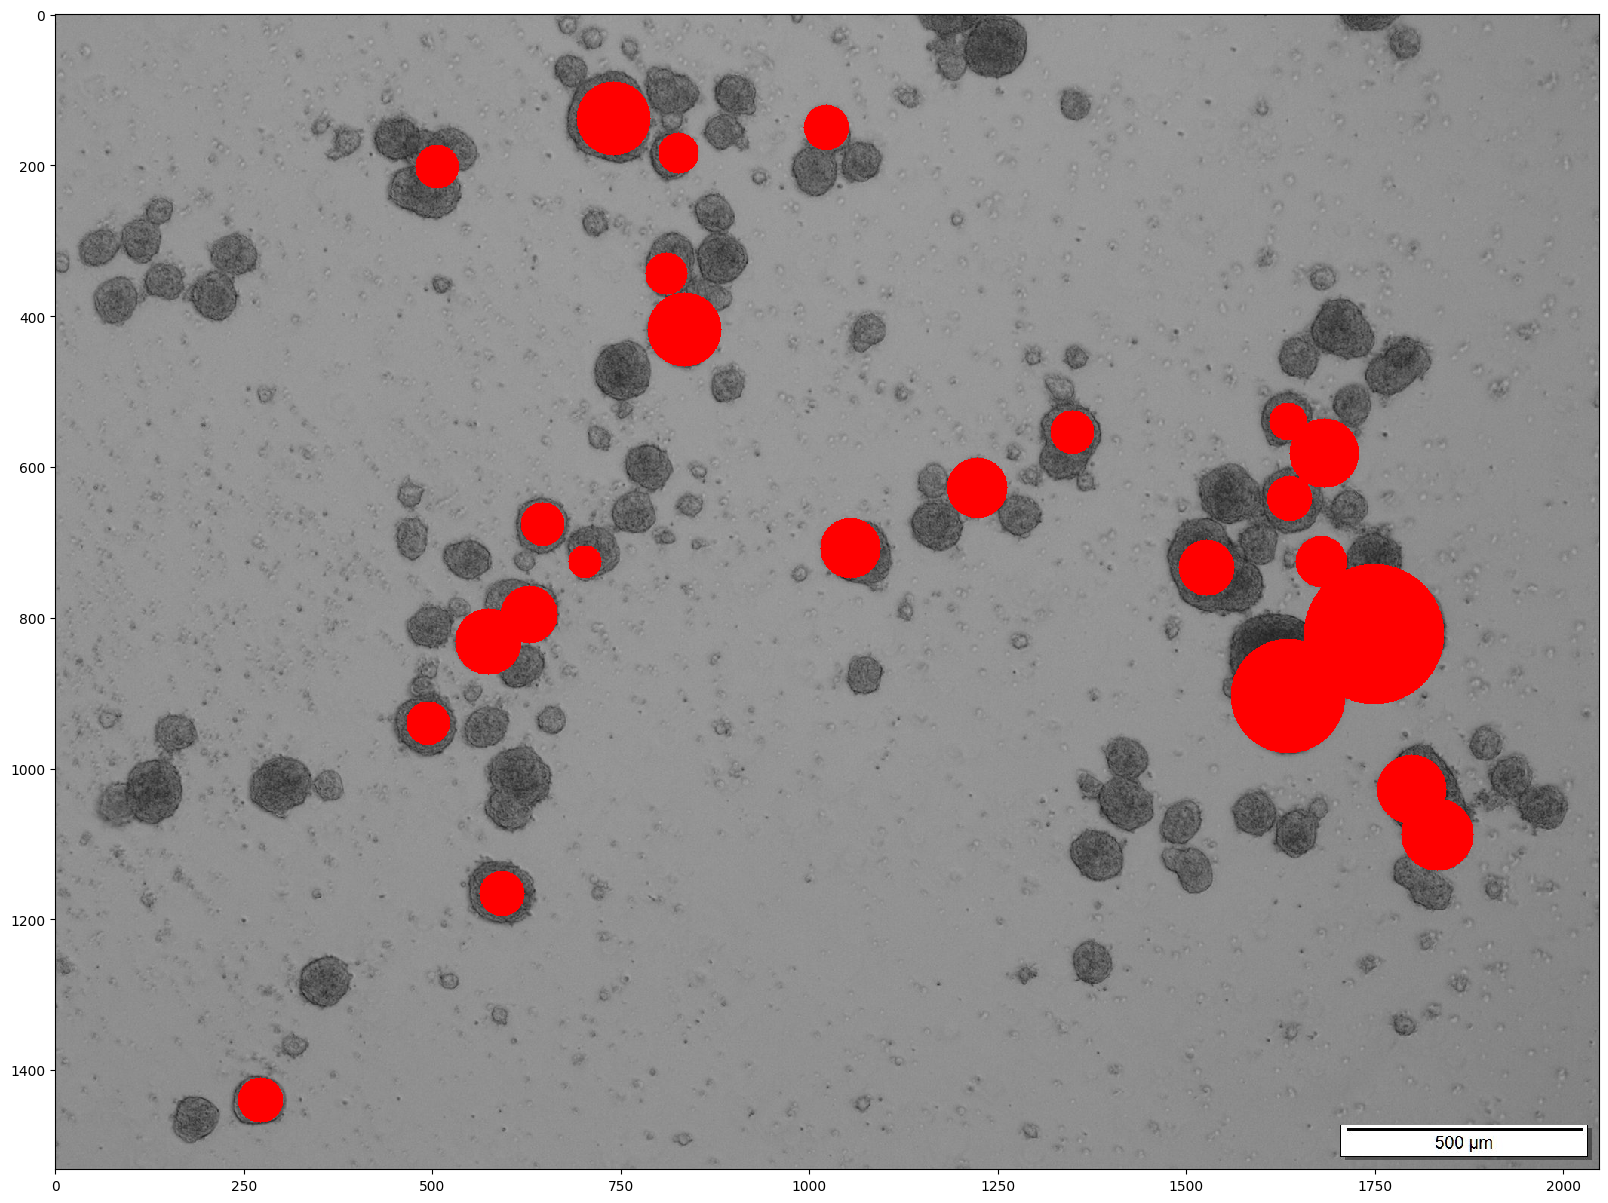

In [14]:

plt.figure(figsize = (50,15))
plt.imshow(identifications_filled, interpolation='nearest')
plt.show()

In [15]:
identified_pixel_count = process_obj.count_colour_pixels(identifications_filled)